In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [4]:
dataset = pd.read_csv("D:\\adult_income.csv")
dataset

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


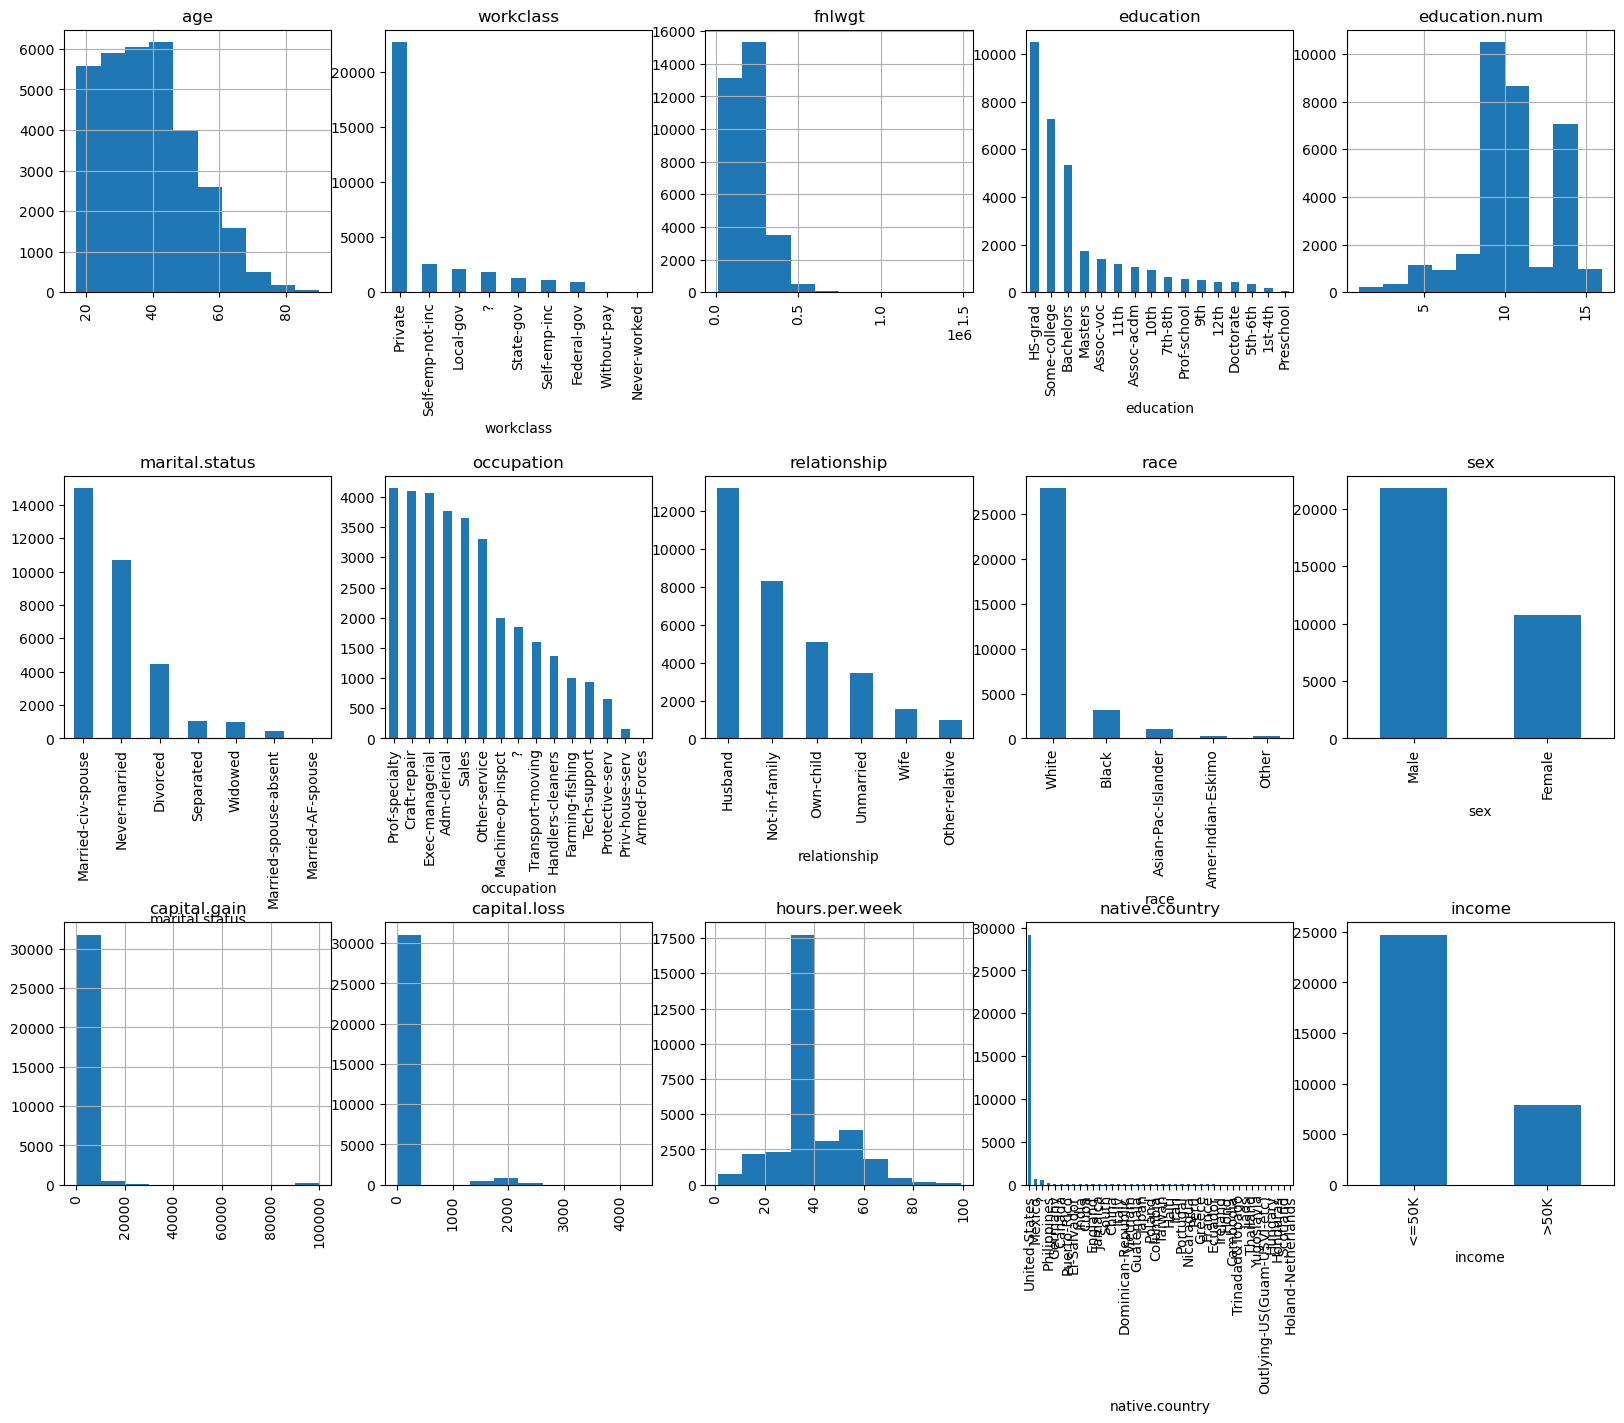

In [7]:
def plot_histogram(my_dataframe, cols=5):
    rows = math.ceil(float(my_dataframe.shape[1]) / cols)
    fig = plt.figure(figsize=(20, 15))
    
    for i, column in enumerate(my_dataframe.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if my_dataframe.dtypes[column] == np.object_:
            my_dataframe[column].value_counts().plot(kind="bar", ax=ax)
        else:
            my_dataframe[column].hist(ax=ax)
            plt.xticks(rotation="vertical")
    plt.subplots_adjust(hspace=0.7, wspace=0.2)
plot_histogram(dataset)

In [10]:
# most people come from which country
country_stats = dataset['native.country'].value_counts()/dataset.shape[0]
country_stats

native.country
United-States                 0.895857
Mexico                        0.019748
?                             0.017905
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua 

In [12]:
# education vs education.num
education_and_num = dataset[['education','education.num']]
education_and_num

,education,education.num
0,HS-grad,9
1,HS-grad,9
2,Some-college,10
3,7th-8th,4
4,Some-college,10
...,...,...
32556,Some-college,10
32557,Assoc-acdm,12
32558,HS-grad,9
32559,HS-grad,9


In [13]:
dataset.drop(['education.num'], axis=1, inplace=True)

In [14]:
# variable type
numeric_feats = dataset.dtypes[dataset.dtypes != 'O'].index
categorical_feats = dataset.dtypes[dataset.dtypes == 'O'].index
print('There are %d numeric features' %(len(numeric_feats)))
print('There are %d categorical features' %(len(categorical_feats)))

There are 5 numeric features
There are 9 categorical features


In [16]:
# take care of missing data for numeric features
def get_missing_data_summary(my_dataframe):
    dataset_na = my_dataframe.isnull().sum()
    dataset_na = dataset_na.drop(dataset_na[dataset_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Count' :dataset_na})
    return missing_data

missing_data = get_missing_data_summary(dataset)
missing_data

,Missing Count


In [17]:
# take care of missing data for categorical features
dataset.workclass.unique()
dataset.workclass.value_counts() # There are 1836 records whose workclass is '?'

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [20]:
workclass_occupation_null = dataset[(dataset['workclass'] == '?') & (dataset['occupation'] == '?')]
workclass_occupation_null.workclass = 'Other'
workclass_occupation_null.occupation = 'Other'
dataset.drop(dataset[(dataset['workclass'] == '?') & (dataset['occupation'] == '?')].index, inplace=True)
dataset = pd.concat((dataset, workclass_occupation_null)).reset_index(drop=True)
dataset

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,35,Other,320084,Bachelors,Married-civ-spouse,Other,Wife,White,Female,0,0,55,United-States,>50K
32557,30,Other,33811,Bachelors,Never-married,Other,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32558,71,Other,287372,Doctorate,Married-civ-spouse,Other,Husband,White,Male,0,0,10,United-States,>50K
32559,41,Other,202822,HS-grad,Separated,Other,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [23]:
#用other替换？后再检查
dataset.workclass.unique()
dataset.workclass.value_counts()
dataset['occupation'].unique()
dataset['occupation'].value_counts()
dataset.drop(dataset[dataset['occupation'] == '?'].index, inplace=True)
dataset['occupation'].unique()
dataset['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Other                1836
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [24]:
dataset['native.country'].unique()
dataset['native.country'].value_counts()

native.country
United-States                 29163
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

In [25]:
dataset['native.country'] = dataset['native.country'].replace('?','Other')
#至此缺失值全部处理完毕

In [26]:
# encoding categorical variables
#将类别型变量转换成哑变量，这是处理类别数据的通用方法。
#当你使用drop_first=True参数时，它会在创建哑变量后，自动丢弃每个分类变量的第一个类别
#通过丢弃第一个类别，你可以减少哑变量的数量，从而避免完全共线性的问题。这样做的前提是，类别型变量是有序的
dataset = pd.get_dummies(dataset, drop_first=True)
dataset

,age,fnlwgt,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Other,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_>50K
0,82,132870,0,4356,18,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
1,54,140359,0,3900,40,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,41,264663,0,3900,40,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,34,216864,0,3770,45,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,38,150601,0,3770,40,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,35,320084,0,0,55,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
32557,30,33811,0,0,99,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
32558,71,287372,0,0,10,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
32559,41,202822,0,0,32,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [27]:
# get DV and IV
X = dataset.iloc[:, :-1].values # create matrics of the features
y = dataset.iloc[:, -1].values # create vector of the dependent variable
# split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [29]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [30]:
# build model
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 0)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [32]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'rbf', random_state = 0)

In [33]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)

In [35]:
# k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
def get_accuracy(model):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, scoring='accuracy', cv = 10, n_jobs = 2, verbose=1)# n_jobs means the number of cpus you want to use
    return accuracies

def print_result(accuracies, model_name):
    print('%s accuracy is: %.4f (std = %.4f)' %(model_name, accuracies.mean(), accuracies.std()))

In [36]:
# apply k-fold
lr_accuracies = get_accuracy(lr_classifier)# 4.8s
knn_accuracies = get_accuracy(knn_classifier) # 22.1s
svc_accuracies = get_accuracy(svc_classifier)# 1.9min
nb_accuracies = get_accuracy(nb_classifier)# 0.7s
rf_accuracies = get_accuracy(rf_classifier)# 35.7s

# check result
print_result(lr_accuracies, 'lr_classifier')
print_result(knn_accuracies, 'knn_classifier')
print_result(svc_accuracies, 'svc_classifier')
print_result(nb_accuracies, 'nb_classifier')
print_result(rf_accuracies, 'rf_classifier')

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    6.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    1.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:  2.2min finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


lr_classifier accuracy is: 0.8509 (std = 0.0052)
knn_classifier accuracy is: 0.8228 (std = 0.0065)
svc_classifier accuracy is: 0.8473 (std = 0.0062)
nb_classifier accuracy is: 0.4236 (std = 0.0138)
rf_classifier accuracy is: 0.8531 (std = 0.0040)


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:  1.3min finished


In [37]:
# apply grid search
from sklearn.model_selection import GridSearchCV

def apply_grid_search(parameters):
    grid_search = GridSearchCV(estimator = rf_classifier,
  param_grid = parameters,
 scoring = 'accuracy',
 cv = 5,
 n_jobs = 6,
 verbose = 1)
    grid_search = grid_search.fit(X_train, y_train)
    best_accuracy = grid_search.best_score_
    best_parameters = grid_search.best_params_
    return best_accuracy, best_parameters

In [38]:
# first round
parameters = [{'n_estimators': [100, 300, 500, 700, 900], 'criterion': ['entropy','gini'], 'max_depth':[2,4,6,8,10], 'min_samples_leaf':[2,4,6,8,10]}]
best_accuracy, best_parameters = apply_grid_search(parameters)
print(best_accuracy)
print(best_parameters)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
0.8575815549065939
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 900}


In [39]:
# second round
parameters = [{'n_estimators': [900,1000,1100,1200], 'criterion': ['gini'], 'max_depth':[10, 12,14, 16,18,20]}]
best_accuracy, best_parameters = apply_grid_search(parameters)
print(best_accuracy)
print(best_parameters)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
0.8618437558886471
{'criterion': 'gini', 'max_depth': 16, 'n_estimators': 1100}


In [40]:
# apply model
classifier = RandomForestClassifier(n_estimators = 1200, criterion = 'gini', max_depth = 16, min_samples_leaf = 2, random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

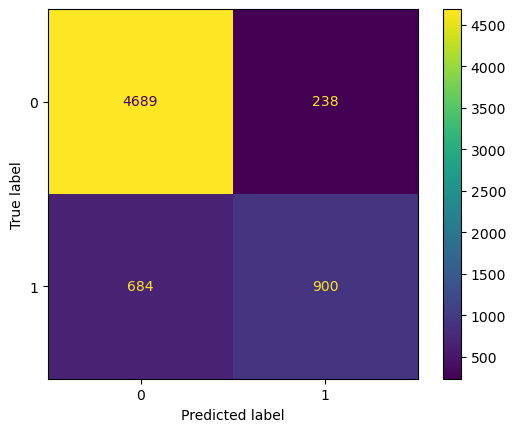

In [44]:
# evaluate with comfusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [45]:
# evaluate with classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.87      0.95      0.91      4927
        True       0.79      0.57      0.66      1584

    accuracy                           0.86      6511
   macro avg       0.83      0.76      0.79      6511
weighted avg       0.85      0.86      0.85      6511

